In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import os
import tarfile
from six.moves import urllib
import seaborn as sns
%matplotlib inline

In [2]:
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml/master/'
HOUSING_PATH = 'datasets/housing'
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + '/housing.tgz'

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path= HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [4]:
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [5]:
fetch_housing_data()

In [6]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## SkLearn useful features !!!!
--------------------------------------------

In [7]:
from sklearn.model_selection import train_test_split

### train_test_split

Parameters:
* test_size : if float between 0 & 1 (% of the training set), if int --> # number of datapoints
* random_state: random seed to ensure same data is use every time

In [8]:
train_set1, test_set1 = train_test_split(housing, test_size = 0.2, random_state = 42)

### Stratified Shuffled split

It is a merge of StratifiedKFold and SuffleSplit, which returns stratified randomized folds.

Parameters:
* n_splits = number of splits / folds
* StratifiedSuffleSplit.split : data set , feature to use for the stratified sampling

In [9]:
housing['income_cat'] = np.ceil(housing['median_income']/1.5)
housing['income_cat'].where(housing['income_cat']< 5, 5, inplace=True)

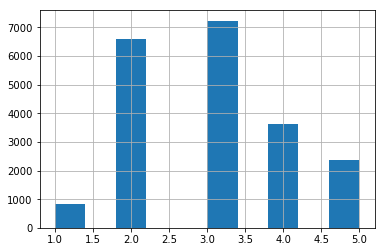

In [10]:
housing['income_cat'].hist();

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

In [12]:
split = StratifiedShuffleSplit(n_splits=1 , test_size=0.2, random_state=42)

In [13]:
for train_index , test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    

In [14]:
# Dataset distribution breakdown 

housing['income_cat'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [22]:
# Stratified sampling keeps the same distribution existing in the initial dataset

strat_train_set['income_cat'] = np.ceil(strat_train_set['median_income']/1.5)
strat_train_set['income_cat'].where(strat_train_set['income_cat']< 5, 5, inplace=True)

In [18]:
strat_train_set['income_cat'].value_counts() / len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64